## Introduction


In this notebook, we will learn how to use the Keras library to build models for classificaiton problems. We will use the popular MNIST dataset, a dataset of images. 

The MNIST database, short for Modified National Institute of Standards and Technology database, is a large database of handwritten digits that is commonly used for training various image processing systems. The database is also widely used for training and testing in the field of machine learning.
    
The MNIST database contains 60,000 training images and 10,000 testing images of digits written by high school students and employees of the United States Census Bureau.

Also, this way, we will get to compare how Artificial neural networks compare to convolutional neural networks, that we will build in the next notebook.


## Objectives for this Notebook    
* Use the MNIST database for training various image processing systems
* Build a neural network
* Train and test the network


Let's start by installing Keras and other necessary libraries.


In [ ]:
%pip install tensorflow_cpu==2.18.0
%pip install matplotlib==3.9.2

In [2]:
import os
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

## Import Keras and Packages


### Import the libraries. 
There might be some warning messages related to floating point round off errors and lack of GPU and other compiler related options. You can ignore these warnings and proceed.


In [4]:
import keras

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Input
from keras.utils import to_categorical
import matplotlib.pyplot as plt

Loading the MNIST dataset from the Keras library. The dataset is readily divided into a training set and a test set.

In [5]:
# import the data
from keras.datasets import mnist

# read the data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Let's confirm the number of images in each set. According to the dataset's documentation, we should have 60000 images in X_train and 10000 images in the X_test.


In [6]:
X_train.shape

(60000, 28, 28)

The first number in the output tuple is the number of images, and the other two numbers are the size of the images in datset. So, each image is 28 pixels by 28 pixels.


Let's visualize the first image in the training set using Matplotlib's scripting layer.


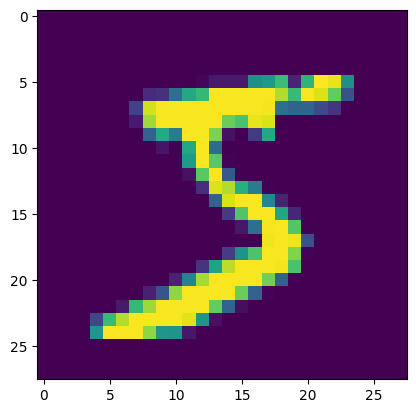

In [7]:
plt.imshow(X_train[0])

With conventional neural networks, we cannot feed in the image as input as is. So we need to flatten the images into one-dimensional vectors, each of size 1 x (28 x 28) = 1 x 784.


In [8]:
# flatten images into one-dimensional vector
num_pixels = X_train.shape[1] * X_train.shape[2] # find size of one-dimensional vector

X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32') # flatten training images
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32') # flatten test images

Since pixel values can range from 0 to 255, let's normalize the vectors to be between 0 and 1.


In [9]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

Finally, before we start building our model, remember that for classification we need to divide our target variable into categories. We use the to_categorical function from the Keras Utilities package.


In [10]:
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

num_classes = y_test.shape[1]
print(num_classes)

10


## Build a Neural Network


In [11]:
# define classification model
def classification_model():
    # create model
    
    model = Sequential()
    model.add(Input(shape=(num_pixels,)))
    model.add(Dense(num_pixels, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    
    # compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

## Train and Test the Network


In [12]:
# build the model
model = classification_model()

# fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, verbose=2)

# evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)

Epoch 1/10
1875/1875 - 18s - 10ms/step - accuracy: 0.9427 - loss: 0.1889 - val_accuracy: 0.9726 - val_loss: 0.0867
Epoch 2/10
1875/1875 - 19s - 10ms/step - accuracy: 0.9753 - loss: 0.0782 - val_accuracy: 0.9712 - val_loss: 0.0886
Epoch 3/10
1875/1875 - 31s - 17ms/step - accuracy: 0.9829 - loss: 0.0542 - val_accuracy: 0.9779 - val_loss: 0.0736
Epoch 4/10
1875/1875 - 22s - 12ms/step - accuracy: 0.9867 - loss: 0.0408 - val_accuracy: 0.9784 - val_loss: 0.0746
Epoch 5/10
1875/1875 - 18s - 9ms/step - accuracy: 0.9895 - loss: 0.0321 - val_accuracy: 0.9792 - val_loss: 0.0751
Epoch 6/10
1875/1875 - 19s - 10ms/step - accuracy: 0.9915 - loss: 0.0259 - val_accuracy: 0.9798 - val_loss: 0.0781
Epoch 7/10
1875/1875 - 17s - 9ms/step - accuracy: 0.9925 - loss: 0.0228 - val_accuracy: 0.9786 - val_loss: 0.0834
Epoch 8/10
1875/1875 - 17s - 9ms/step - accuracy: 0.9934 - loss: 0.0197 - val_accuracy: 0.9827 - val_loss: 0.0750
Epoch 9/10
1875/1875 - 16s - 9ms/step - accuracy: 0.9941 - loss: 0.0177 - val_accur

Let's print the accuracy and the corresponding error.


In [19]:
print('Accuracy: {:.2f} % \n Error: {:.2f}'.format(scores[1]*100, 1 - scores[1]))        

Accuracy: 98.04 % 
 Error: 0.02


Sometimes, we cannot afford to retrain your model everytime you want to use it, especially if you are limited on computational resources and training your model can take a long time. Therefore, with the Keras library, you can save your model after training. To do that, we use the save method.


In [20]:
model.save('classification_model.keras')

Since our model contains multidimensional arrays of data, then models are usually saved as .keras files.


When you are ready to use your model again, you use the load_model function from <strong>keras.saving</strong>.


In [ ]:
pretrained_model = keras.saving.load_model('classification_model.keras')

Create a neural network model with 6 dense layers and compare its accuracy


In [22]:
model2 = Sequential()
model2.add(Input(shape=(num_pixels,)))
model2.add(Dense(num_pixels, activation='relu'))
model2.add(Dense(100, activation='relu'))
model2.add(Dense(100, activation='relu'))
model2.add(Dense(80, activation='relu'))
model2.add(Dense(40, activation='relu'))
model2.add(Dense(num_classes, activation='softmax'))

model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 784)            │       615,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 80)             │         8,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 40)             │         3,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │           410 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 715,770 (2.73 MB)

 Trainable params: 715,770 (2.73 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, verbose=2)

Epoch 1/10
1875/1875 - 11s - 6ms/step - accuracy: 0.9325 - loss: 0.2213 - val_accuracy: 0.9681 - val_loss: 0.1020
Epoch 2/10
1875/1875 - 10s - 5ms/step - accuracy: 0.9716 - loss: 0.0966 - val_accuracy: 0.9727 - val_loss: 0.0907
Epoch 3/10
1875/1875 - 10s - 5ms/step - accuracy: 0.9798 - loss: 0.0685 - val_accuracy: 0.9711 - val_loss: 0.0999
Epoch 4/10
1875/1875 - 10s - 5ms/step - accuracy: 0.9835 - loss: 0.0551 - val_accuracy: 0.9779 - val_loss: 0.0847
Epoch 5/10
1875/1875 - 10s - 5ms/step - accuracy: 0.9863 - loss: 0.0449 - val_accuracy: 0.9756 - val_loss: 0.0890
Epoch 6/10
1875/1875 - 10s - 5ms/step - accuracy: 0.9887 - loss: 0.0367 - val_accuracy: 0.9785 - val_loss: 0.0837
Epoch 7/10
1875/1875 - 10s - 5ms/step - accuracy: 0.9906 - loss: 0.0314 - val_accuracy: 0.9760 - val_loss: 0.0887
Epoch 8/10
1875/1875 - 10s - 5ms/step - accuracy: 0.9915 - loss: 0.0299 - val_accuracy: 0.9803 - val_loss: 0.0809
Epoch 9/10
1875/1875 - 10s - 5ms/step - accuracy: 0.9929 - loss: 0.0254 - val_accuracy: 

In [26]:
model2.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9760 - loss: 0.1009


[0.087115578353405, 0.9800999760627747]

In [28]:
model2.save('classification_model2.keras')

Now, load the the earlier saved model, train it further for 10 more epochs and check the accuracy


In [30]:
model2 = keras.saving.load_model('classification_model2.keras')

model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, verbose=2)

Epoch 1/10
1875/1875 - 11s - 6ms/step - accuracy: 0.9933 - loss: 0.0208 - val_accuracy: 0.9794 - val_loss: 0.0958
Epoch 2/10
1875/1875 - 11s - 6ms/step - accuracy: 0.9941 - loss: 0.0195 - val_accuracy: 0.9815 - val_loss: 0.0852
Epoch 3/10
1875/1875 - 10s - 5ms/step - accuracy: 0.9949 - loss: 0.0182 - val_accuracy: 0.9831 - val_loss: 0.0833
Epoch 4/10
1875/1875 - 10s - 5ms/step - accuracy: 0.9957 - loss: 0.0174 - val_accuracy: 0.9833 - val_loss: 0.0788
Epoch 5/10
1875/1875 - 10s - 5ms/step - accuracy: 0.9956 - loss: 0.0157 - val_accuracy: 0.9806 - val_loss: 0.0897
Epoch 6/10
1875/1875 - 10s - 5ms/step - accuracy: 0.9969 - loss: 0.0117 - val_accuracy: 0.9777 - val_loss: 0.1206
Epoch 7/10
1875/1875 - 11s - 6ms/step - accuracy: 0.9954 - loss: 0.0161 - val_accuracy: 0.9818 - val_loss: 0.0924
Epoch 8/10
1875/1875 - 11s - 6ms/step - accuracy: 0.9963 - loss: 0.0130 - val_accuracy: 0.9828 - val_loss: 0.0892
Epoch 9/10
1875/1875 - 11s - 6ms/step - accuracy: 0.9962 - loss: 0.0135 - val_accuracy: 

In [31]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9774 - loss: 0.0970


[0.08265936374664307, 0.980400025844574]